### 🍎 Apple Quality Classifier

Predicting apple quality made easy! This project uses a Multi-Layer Perceptron (MLP) to classify apples based on Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, and Acidity.

Highlights:

Performance metrics: Model evaluation includes F1-score for accuracy.

Visual analysis: Confusion matrix and SHAP charts are used to interpret predictions and highlight feature importance.

In [1]:
import pandas as pd
import numpy as np
import shap
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

c:\Users\beach\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset Preparation:
The apple quality dataset is cleaned and preprocessed for modeling. The target variable ('Quality') is encoded as 0 (Bad) and 1 (Good). Features are normalized using MinMaxScaler, unnecessary columns are removed, and the data is split into training (80%) and testing (20%) sets for model development.

In [2]:
df = pd.read_csv('apple_quality.csv')   #loading the dataset
data = df.drop(index = 4000)   # removing the last row (its the name of creator)
le = LabelEncoder()   #changing the good and bad qualities to 1 and 0
data['Quality'] =le.fit_transform(data['Quality'])
scaler = MinMaxScaler()   #normalizing  the data
df = scaler.fit_transform(data)
df = pd.DataFrame(df,columns=data.columns)
del df['A_id']   #deleting unneccesory columns
X = df.drop('Quality',axis=1)   #devide the data frame to X and Y 
y = df["Quality"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)   #spliting the data into train and test data

# TRaining Model
Model Training & Evaluation
A Multi-Layer Perceptron (MLP) classifier with three hidden layers (8, 16, 16 neurons) is trained on the apple quality dataset. The model uses tanh activation, Adam optimizer, and early stopping to prevent overfitting.
Predictions are made on both training and test sets, and performance is evaluated using the F1-score, providing a balance between precision and recall.

In [3]:
model_3 = MLPClassifier(activation='tanh',
                       random_state=18,
                       hidden_layer_sizes=(8,16,16),
                       alpha=0.001,
                       batch_size=128,
                       solver='adam',
                       verbose=True,
                       max_iter=800,
                       n_iter_no_change=300, 
                       learning_rate_init=0.05,
                       momentum=0.9)
model_3.fit(X_train,y_train)
y_pred_test = model_3.predict(X_test)
y_pred_train = model_3.predict(X_train)
f1_test = f1_score(y_test,y_pred_test)

Iteration 1, loss = 0.67642888
Iteration 2, loss = 0.56237532
Iteration 3, loss = 0.53350463
Iteration 4, loss = 0.51437434
Iteration 5, loss = 0.51037797
Iteration 6, loss = 0.48707663
Iteration 7, loss = 0.44635820
Iteration 8, loss = 0.45877940
Iteration 9, loss = 0.41496808
Iteration 10, loss = 0.40921307
Iteration 11, loss = 0.45734315
Iteration 12, loss = 0.41349203
Iteration 13, loss = 0.39178955
Iteration 14, loss = 0.38563259
Iteration 15, loss = 0.40397997
Iteration 16, loss = 0.39153918
Iteration 17, loss = 0.38325149
Iteration 18, loss = 0.38403932
Iteration 19, loss = 0.38471464
Iteration 20, loss = 0.40194344
Iteration 21, loss = 0.38578002
Iteration 22, loss = 0.33883155
Iteration 23, loss = 0.34404338
Iteration 24, loss = 0.40249971
Iteration 25, loss = 0.36311349
Iteration 26, loss = 0.32710780
Iteration 27, loss = 0.32596556
Iteration 28, loss = 0.31601678
Iteration 29, loss = 0.33203509
Iteration 30, loss = 0.32164578
Iteration 31, loss = 0.31365418
Iteration 32, los

c:\Users\beach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


# ploting,loss/epoch curve,shap feature importance,confusion matrix 

Model Interpretation & Visualization
The trained MLP model is interpreted using SHAP to understand feature importance on predictions.
Performance is evaluated with F1-scores for training and test sets, and a confusion matrix visualizes classification results.
The training loss curve is plotted to show convergence over iterations, and SHAP summary plots highlight the most influential features.

Using 3200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/800 [00:00<?, ?it/s]

100%|██████████| 800/800 [03:39<00:00,  3.65it/s]


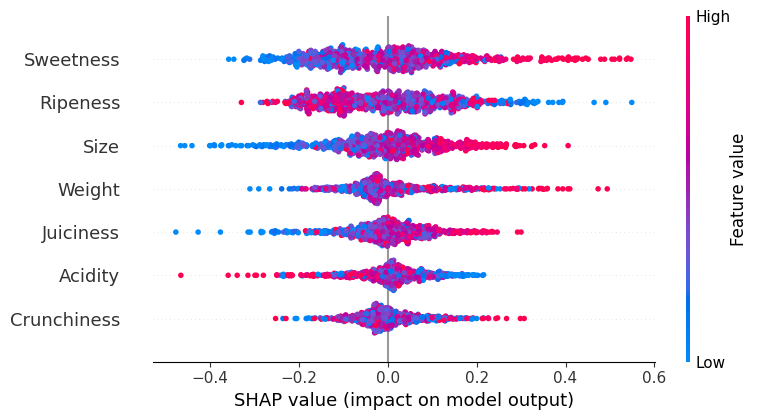

f1_test: 0.9504232164449818,  f1_train  : 0.9699812382739212


C:\Users\beach\AppData\Local\Temp\ipykernel_1392\1119645934.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


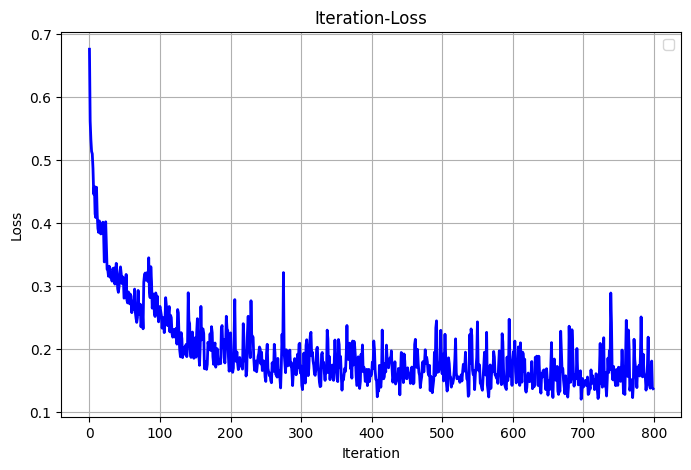

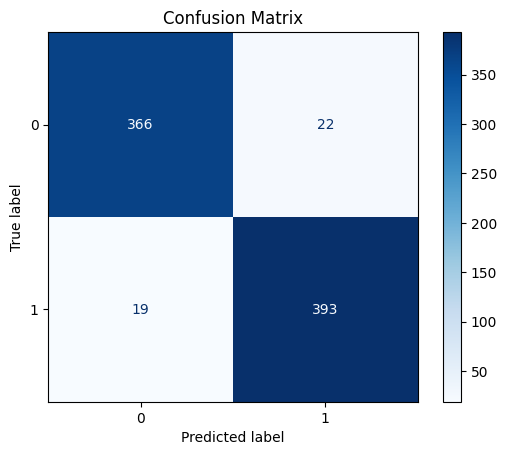

In [4]:
explainer = shap.KernelExplainer(model_3.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
f1_train = f1_score(y_train,y_pred_train)
cm = confusion_matrix(y_test,y_pred_test)
print(f'f1_test: {f1_test},  f1_train  : {f1_train}')
plt.figure(figsize=(8,5))
plt.legend()
plt.plot(model_3.loss_curve_, color='b', linewidth=2)
plt.title('Iteration-Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()